<h1> Cost functions

<h2> Threshold adjustment

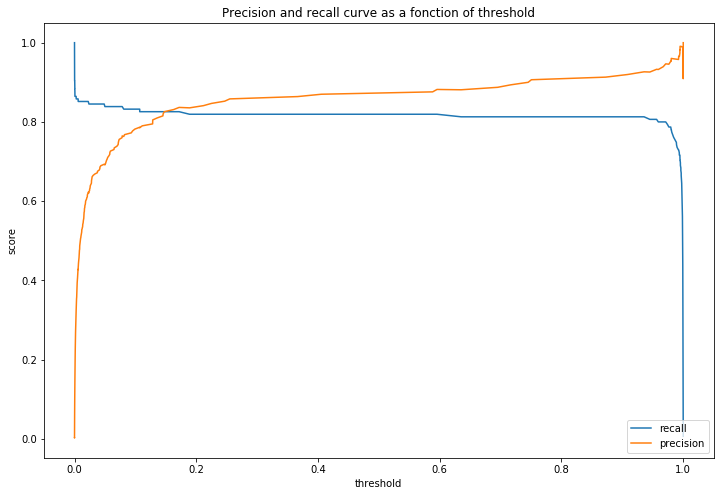

In [516]:
plt.figure(figsize=(12,8))
plt.plot(threshold_lg_o, recall_lg_o[:-1], label="recall")
plt.plot(threshold_lg_o, precision_lg_o[:-1], label="precision")
plt.xlabel('threshold')
plt.ylabel('score')
plt.title("Precision and recall curve as a fonction of threshold")
plt.legend(loc="lower right")
plt.show()

<h2> Cost evaluation

In [474]:
check_cost_u = 2000
additional_cost_u = 10000

In [475]:
threshold = 0.9

In [476]:
def make_prediction(y_score, threshold):
    y_fraud = np.zeros(len(y_score))
    y_fraud[y_score < threshold] = 0
    y_fraud[y_score >= threshold] = 1
    return y_fraud

In [482]:
y_fraud = make_prediction(y_score_lg_u[:,1], threshold=0.5)
len(y_fraud), sum(y_fraud)

(85443, 170.0)

<h3> Cost of fraudulent transaction with algo checking

In [483]:
check_cost = y_fraud.sum() * check_cost_u
check_cost

340000.0

In [484]:
remaining_fraud_cost = X_test["Amount"][y_test-y_fraud == 1].sum()
remaining_fraud_cost

2468.93

In [485]:
additional_cost = len(y_test[y_test-y_fraud == 1]) * additional_cost_u
additional_cost

240000

In [486]:
total_check_cost = check_cost + remaining_fraud_cost + additional_cost
total_check_cost

582468.9299999999

In [487]:
def check_cost(y_pred, check_cost_u, additional_cost_u):
    check_cost = y_pred.sum() * check_cost_u
    remaining_fraud_cost = X_test["Amount"][y_test-y_pred == 1].sum()
    additional_cost = len(y_test[y_test-y_pred == 1]) * additional_cost_u
    return check_cost + remaining_fraud_cost + additional_cost

In [488]:
check_cost(y_fraud, check_cost_u, additional_cost_u)

582468.9299999999

<h3> Cost of fraudulent transaction without algo checking

In [489]:
def actual_cost(additional_cost_u):
    remaining_fraud_cost = X_test["Amount"][y_test == 1].sum()
    additional_cost = len(y_test[y_test == 1]) * additional_cost_u
    return remaining_fraud_cost + additional_cost

In [490]:
actual_cost(additional_cost_u)

1569062.37

<h3> Gain

In [491]:
remaining_fraud_cost = X_test["Amount"][y_test == 1].sum()
remaining_fraud_cost

19062.370000000003

In [492]:
additional_cost = len(y_test[y_test == 1]) * additional_cost_u
additional_cost

1550000

In [493]:
total_actual_cost = remaining_fraud_cost + additional_cost
total_actual_cost

1569062.37

In [494]:
gain = total_actual_cost - total_check_cost
gain

986593.4400000002

In [495]:
def gain(y_score, threshold, check_cost_u=200, additional_cost_u=1000):
    y_pred = make_prediction(y_score, threshold)
    total_check_cost = check_cost(y_pred, check_cost_u, additional_cost_u)
    total_actual_cost = actual_cost(additional_cost_u)
    return total_actual_cost - total_check_cost

In [496]:
gain(y_score_lg_o[:,1], threshold=0.3)

113437.43

In [509]:
thresholds = np.arange(30, 980)/1000

In [510]:
f = lambda t: gain(y_score_lg_o[:,1], t)
gain_lg_o = list(map(f, thresholds))
len(gain_lg_o), max(gain_lg_o)

(950, 114633.67)

<h3> Plot gain function of threshold

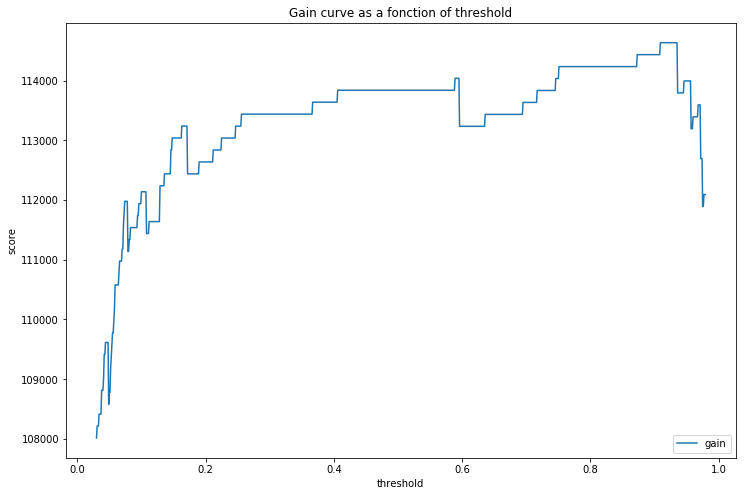

In [511]:
plt.figure(figsize=(12,8))
plt.plot(thresholds, gain_lg_o, label="gain")
plt.xlabel('threshold')
plt.ylabel('score')
plt.title("Gain curve as a fonction of threshold")
plt.legend(loc="lower right")
plt.show()